In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 7: Testing Hypotheses

## References

* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-fa23/resources/quick_reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.
- Unless you are asked otherwise, use the non-interactive visualizations when asked to produce a visualization for a task.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following code cell to import the tools for this assignment.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Vaccinations Across The Nation

A vaccination clinic has two types of vaccines against a disease. Each person who comes in to be vaccinated gets either Vaccine 1 or Vaccine 2. One week, everyone who came in on Monday, Wednesday, and Friday was given Vaccine 1. Everyone who came in on Tuesday and Thursday was given Vaccine 2. The clinic is closed on weekends.

Doctor DeNero at the clinic said, "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

But Doctor Sahai said, "No, it's not. We're not doing anything like tossing a coin."

That week, the clinic gave Vaccine 1 to 211 people and Vaccine 2 to 107 people. Conduct a test of hypotheses to see which doctor's position is better supported by the data.

### Task 01 📍

Given the information above, what was the sample size for the data, and what was the percentage of people who got **Vaccine 1?**

*Note*: Your percent should be a number between 0 and 100.

_Points:_ 3

In [3]:
sample_size = 318
percent_V1 = 100 * 211 / 318

print(f"Sample Size: {sample_size}")
print(f"Vaccine 1 Percent: {percent_V1}")

Sample Size: 318
Vaccine 1 Percent: 66.35220125786164


In [4]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ sample_size is an int
task_01 - 2 message: ✅ percent_V1 is numerical (float or int)
task_01 - 3 message: ✅ sample_size is within a possible range of values.
task_01 - 4 message: ✅ percent_V1 is a value betwen 0 and 100.

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

State the null hypothesis. It should reflect the position of either Dr. DeNero or Dr. Sahai.

*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.

_Points:_ 2

The null hypothesis is the probability of receiving vaccine 1 is 0.6, and the probability of receiving vaccine 2 is 0.4.

<!-- END QUESTION -->

### Task 03 📍🔎

<!-- BEGIN QUESTION -->

State the alternative hypothesis. It should reflect the position of the doctor you did not choose to represent in Task 02.

*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.

_Points:_ 2

The alternative hypothesis is the probability of receiving vaccine 1 is different than 0.6.

<!-- END QUESTION -->

### Task 04 📍

One of the test statistics below is appropriate for testing these hypotheses. Assign the variable `valid_test_stat` to the number corresponding to the correct test statistic.

1. percent of heads - 60
2. percent of heads - 50
3. |percent of heads - 60|
4. |percent of heads - 50|

_Points:_ 2

In [5]:
valid_test_stat = 3
valid_test_stat

3

In [6]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ valid_test_stat is an integer.
task_04 - 2 message: ✅ valid_test_stat is a number between 1 and 4.

### Task 05 📍

Using your answer from Task 01 and Task 04, find the observed value of the test statistic and assign it to the variable `observed_statistic`.

_Points:_ 2

In [7]:
observed_statistic = abs(percent_V1 - 3/5 * 100)
observed_statistic

6.352201257861637

In [8]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ observed_statistic is a float.
task_05 - 2 message: ✅ observed_statistic is a number between 0 and 100.

### Task 06 📍

In order to perform this hypothesis test, you must simulate the test statistic. From the four options below, pick the assumption that is needed for this simulation. Assign `assumption_needed` to an integer corresponding to the assumption.

1. The statistic must be simulated under the null hypothesis.
2. The statistic must be simulated under the alternative hypothesis.
3. The statistic must be simulated under both hypotheses.
4. No assumptions are needed. We can just simulate the statistic.

_Points:_ 2

In [9]:
assumption_needed = 1
assumption_needed

1

In [10]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ assumption_needed is an int.
task_06 - 2 message: ✅ assumption_needed is a number between 1 and 4.

### Task 07 📍🔎

<!-- BEGIN QUESTION -->

Simulate 20,000 values of the test statistic under the assumption you picked in Task 06. 

As usual, start by defining a function that simulates one value of the statistic. Your function should use `sample_proportions`. (You may find a variable defined in Task 01 useful here!) Then, write a `for` loop to simulate multiple values and collect them in the array `simulated_statistics`.

Use as many lines of code as you need. We have included the code that visualizes the distribution of the simulated values. The red dot represents the observed statistic you found in Task 05.

_Points:_ 4

In [11]:
vs_proportions = make_array(0.6, 0.4)
vs1_proportions = vs_proportions.item(0)

def one_simulated_statistic():
    sample_proportion_V1 = sample_proportions(sample_size, vs_proportions).item(0)
    return 100 * abs(sample_proportion_V1 - vs1_proportions)
    

num_simulations = 20000
simulated_statistics = make_array() 

for i in np.arange(num_simulations):
    simulated_statistics = np.append(simulated_statistics, one_simulated_statistic())

# Run the this cell a few times to see how the simulated statistic changes
one_simulated_statistic()

2.8930817610062887

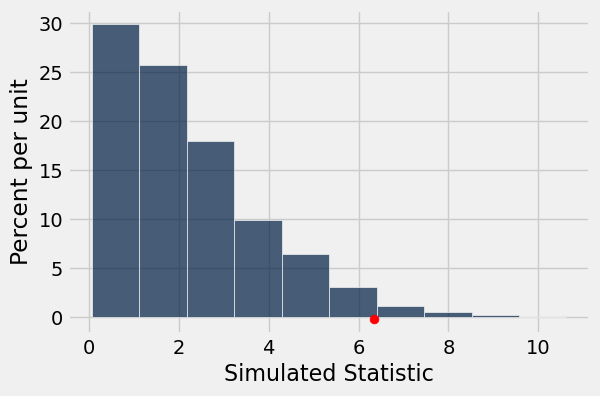

In [12]:
# Run this cell to produce a histogram of the simulated statistics

Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plt.scatter(observed_statistic, -0.002, color='red', s=40);

<!-- END QUESTION -->

### Task 08 📍

Using `simulated_statistics`, `observed_statistic`, and `num_simulations`, find the empirical p-value based on the simulation.

_Points:_ 2

In [13]:
p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations
p_value

0.01885

In [14]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ p_value is a float.
task_08 - 2 message: ✅ p_value is a number between 0 and 1.

### Task 09 📍

Assign `correct_doctor` to the number corresponding to the correct statement below. Use the 5% cutoff for the p-value.

1. The data support Dr. DeNero's position more than they support Dr. Sahai's.
2. The data support Dr. Sahai's position more than they support Dr. DeNero's.

As a reminder, here are the two claims made by Dr. DeNero and Dr. Sahai:
> **Doctor DeNero:** "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

>**Doctor Sahai:** "No, it's not. We're not doing anything like tossing a coin."

_Points:_ 2

In [15]:
correct_doctor = 2
correct_doctor

2

In [16]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ correct_doctor is an int.
task_09 - 2 message: ✅ correct_doctor is either 1 or 2.

## Using TVD as a Test Statistic

Before beginning this section, please read [this section](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html#a-new-statistic-the-distance-between-two-distributions) of the textbook on TVD!

**Total variation distance (TVD)** is a special type of test statistic that we use when we want to compare two distributions of *categorical data*. It is often used when we observe that a set of observed proportions/probabilities is different than what we expect under the null model. 

Consider a six-sided die that we roll 6,000 times. If the die is fair, we would expect that each face comes up $\frac{1}{6}$ of the time. By random chance, a fair die won't always result in equal proportions (that is, we won't get exactly 1,000 of each face). However, if we suspect that the die might be unfair based on the data, we can conduct a hypothesis test using TVD to compare the expected [$\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$] distribution to what is actually observed.

In this part of the homework, we'll look at how we can use TVD to determine the effect that different factors have on happiness. 

We will be working with data from the [Gallup World Poll](https://www.gallup.com/analytics/349487/gallup-global-happiness-center.aspx#:~:text=World%20Happiness%20Report&text=Using%20the%20Gallup%20World%20Poll,about%20the%20World%20Happiness%20Report.) that is presented in the World Happiness Report, a survey of the state of global happiness. The survey ranked 155 countries by overall happiness and estimated the influence that economic production, social support, life expectancy, freedom, absence of corruption, and generosity had on population happiness. The study has been repeated for several years, but we'll be looking at data from the 2016 survey.

Run the cell below to load in the `happiness_scores` table.

In [17]:
happiness_scores = Table.read_table("happiness_scores.csv")
happiness_scores.show(5)

Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.1269,0.79579,0.59609,0.35776,0.37895
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


Participants in the study were asked to evaluate their life satisfaction from a scale of 0 (worst possible life) to 10 (best possible life). The responses for each country were averaged to create the `Happiness Score`.

The columns `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Trust (Government Corruption)`, and `Generosity` estimate the extent to which each factor influences happiness, both for better or for worse. The happiness score is the sum of these factors; the larger a factor is, the more it contributes to overall happiness. [In other words, if you add up all the factors (in addition to a "Difference from Dystopia" value we excluded in the dataset), you get the happiness score.]

Let's look at the different factors that affect happiness in the United States. Run the cell below to view the row in `us_happiness` that contains data for the United States.

In [18]:
us_happiness = happiness_scores.where("Country", "United States")
us_happiness

Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
United States,North America,13,7.104,7.02,7.188,1.50796,1.04782,0.779,0.48163,0.14868,0.41077


**To compare the different factors, we'll look at the proportion of the happiness score that is attributed to each variable. 
You can find these proportions in the table `us_happiness_factors` after running the cell below.**

*Note:* The factors shown in `us_happiness` don't add up exactly to the happiness score, so we adjusted the proportions to  only account for the data we have access to. The proportions were found by dividing each Happiness Factor value by the sum of all Happiness Factor values in `us_happiness`.

In [19]:
us_happiness_factors = Table().read_table("us_happiness_factors.csv")
us_happiness_factors

Happiness Factor,Proportion of Happiness Score
Economy (GDP per Capita),0.344609
Family,0.239455
Health (Life Expectancy),0.178022
Freedom,0.110065
Trust (Government Corruption),0.0339773
Generosity,0.0938718


### Task 10 📍🔎

<!-- BEGIN QUESTION -->

Suppose we want to test whether or not each factor contributes the same amount to the overall Happiness Score. Define the null hypothesis, alternative hypothesis, and test statistic in the cell below. Feel free to check your work with another student or course staff.

*Note:* Please format your answer as follows:
- Null Hypothesis: ...  
- Alternative Hypothesis: ...  
- Test Statistic: ...  

_Points:_ 3

The null hypothesis is that all the happiness factors are equally important for a happy mood; each attribute contributes to 1/6 of the overall happiness score. 
The alternative hypothesis is that the happiness factor influences differences in happiness moods.
Test Statistic the total variation distance of our proportion is 1/6 in our six happiness factors. 

<!-- END QUESTION -->

### Task 11 📍

Write a function `calculate_tvd` that takes in the observed distribution (`obs_dist`) and expected distribution under the null hypothesis (`null_dist`) and calculates the total variation distance. Use this function to set `observed_tvd` to be equal to the observed test statistic.

_Points:_ 2

In [32]:
null_distribution = np.ones(6) * (1/6)

def calculate_tvd(obs_dist, null_dist):
    return sum(np.abs(obs_dist - null_dist)) / 2
    
observed_tvd = calculate_tvd(us_happiness_factors.column('Proportion of Happiness Score'), null_distribution)
observed_tvd

0.26208562431156396

In [33]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ observed_tvd is a float.
task_11 - 2 message: ✅ observed_tvd seems correct.

### Task 12 📍

Create an array called `simulated_tvds` that contains 10,000 simulated values under the null hypothesis. Assume that the original sample consisted of 1,000 individuals.

*Hint:* The `sample_proportions` function may be helpful to you. Refer to the Python Reference Guide in Canvas.

In [39]:
simulated_tvds = make_array()
distances = 10_000

def happy_simulated_tvds():
    happy_sample_distribution = sample_proportions(1000, null_distribution)
    return calculate_tvd(happy_sample_distribution, null_distribution)

for i in np.arange(distances): 
    simulated_tvds = np.append(simulated_tvds, happy_simulated_tvds())

Run the cell below to plot a histogram of your simulated test statistics, as well as a red dot representing the observed value of the test statistic.

_Points:_ 4

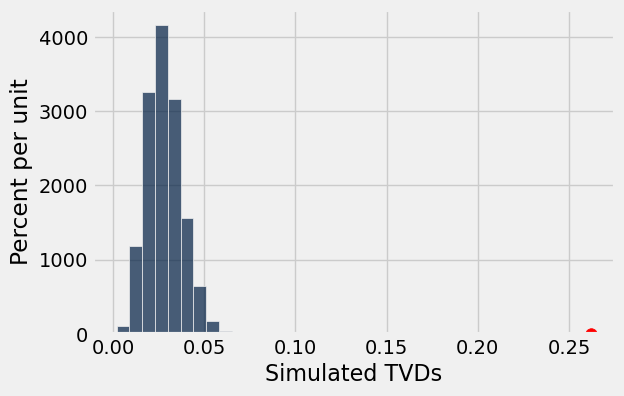

In [40]:
Table().with_column("Simulated TVDs", simulated_tvds).hist()
plt.scatter(observed_tvd, 0, color='red', s=70, zorder=2);
plt.show();

In [41]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ simulated_tvds has 10,000 items in it.
task_12 - 2 message: ✅ Each value in simulated_tvds is 0 or larger.
task_12 - 3 message: ✅ None of the values in simulated_tvds are the same.
task_12 - 4 message: ✅ It seems like you are simulating under the null hypothesis.

### Task 13 📍

Use your simulated statistics to calculate the p-value of your test. Make sure that this number is consistent with what you observed in the histogram above.

_Points:_ 1

In [42]:
p_value_tvd = np.count_nonzero(simulated_tvds >= observed_tvd) / distances
p_value_tvd

0.0

In [43]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ p_value_tvd is a number between 0 and 1.

### Task 14 📍🔎

<!-- BEGIN QUESTION -->

What can you conclude about how each factor contributes to the overall happiness score in the US? Explain your answer using the results of your hypothesis test. Assume a p-value cutoff of 5%.

_Points:_ 2

We have strong evidence to reject the null hypothesis as the P-value is less than 1%. This mean the each factor doesn't contribute the same to the overall happiness score in the US. 

<!-- END QUESTION -->

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the autograder does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ sample_size is an int
task_01 - 2 message: ✅ percent_V1 is numerical (float or int)
task_01 - 3 message: ✅ sample_size is within a possible range of values.
task_01 - 4 message: ✅ percent_V1 is a value betwen 0 and 100.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ valid_test_stat is an integer.
task_04 - 2 message: ✅ valid_test_stat is a number between 1 and 4.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ observed_statistic is a float.
task_05 - 2 message: ✅ observed_statistic is a number between 0 and 100.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ assumption_needed is an int.
task_06 - 2 message: ✅ assumption_needed is a number between 1 and 4.

task_08 results: All test cases passed!
task_08 - 1 message: ✅ p_value is a float.
task_08 - 2 message: ✅ p_value is a number between 0 and 1.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ correct_doctor 